In [165]:
from scipy.io import netcdf
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.style

import matplotlib

matplotlib.style.use('classic')

import statsmodels.api as sm

In [166]:
data1='C:/Users/yashg/OneDrive/Desktop/CMU/Project/Williams/sgp1sbd449precipDSDC1.c1.20110520.060000.nc'

d=Dataset(data1,'r')

print(d)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    dimensions(sizes): time(660), sbd449_range(61), precip_range(250), single_value(1)
    variables(dimensions): float32 bad_flag(single_value), float32 site_altitude(single_value), float32 site_latitude_deg(single_value), float32 site_latitude_min(single_value), float32 site_latitude_sec(single_value), float32 site_longitude_deg(single_value), float32 site_longitude_min(single_value), float32 site_longitude_sec(single_value), float32 sbd449_range(sbd449_range), float32 sbd_precip_range(precip_range), float32 sbd449_time_year(time), float32 sbd449_time_dayofyear(time), float32 sbd449_time_month(time), float32 sbd449_time_dayofmonth(time), float32 sbd449_time_hour(time), float32 sbd449_time_minute(time), float32 sbd449_time_second(time), float32 sbd449_Dm_mu_Dm(time,sbd449_range), float32 sbd449_Dm_mu_Dmin(time,sbd449_range), float32 sbd449_Dm_mu_Dmax(time,sbd449_range), float32 sbd449_Dm_m

In [167]:
#Importing vertical velocity, rain rate, liquid content
v=d.variables['sbd449_gamma_omega'][:]

r=d.variables['sbd449_gamma_R'][:]

w=d.variables['sbd449_gamma_W'][:]

In [168]:
v.shape,r.shape,w.shape

((660, 61), (660, 61), (660, 61))

In [169]:
#Flattening for regression
vf=np.ma.filled(v.flatten('F'))
rf=np.ma.filled(r.flatten('F'))
wf=np.ma.filled(w.flatten('F'))

In [170]:
df={'V':vf,'R':rf,'W':wf}
data=pd.DataFrame(df)

In [171]:
data.shape

(40260, 3)

In [172]:
#Regressing vertical velocity and rain rate
data=data[data['V']>-15]
data=data[data['V']<15]

In [173]:
data.shape
#Removed around 7000 points

(34468, 3)

Regressing for Rain Rate

In [174]:
x=np.column_stack([data['V'],data['V']**0])
y=data['R']

mod = sm.OLS(y, x)
res = mod.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      R   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     19.79
Date:                Thu, 06 Feb 2020   Prob (F-statistic):           8.69e-06
Time:                        17:35:42   Log-Likelihood:            -2.5922e+05
No. Observations:               34468   AIC:                         5.185e+05
Df Residuals:                   34466   BIC:                         5.185e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             8.8674      1.994      4.448      0.000       4.960      12.775
const         57.4867      2.413     23.821      0.000      52.757      62.217
==============================================================================
Omnibus:                    97947.925   Durbin-Watson:                   1.485
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       6323313656.194
Skew:                          37.910   Prob(JB):                         0.00
Kurtosis:                    2099.941   Cond. No.                         1.23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

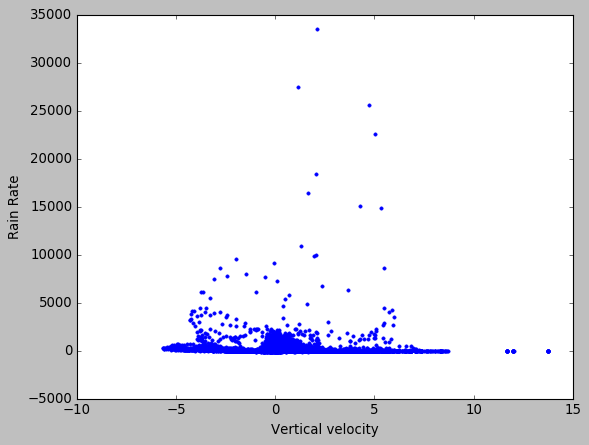

In [175]:
plt.plot(data['V'],data['R'],'.')
plt.xlabel('Vertical velocity')
plt.ylabel('Rain Rate')
plt.show()

In [176]:
#Filtering data even further
data2=data[data['R']>0]
data2=data2[data2['R']<2500]

In [177]:
x=np.column_stack([data2['V'],data2['V']**0])
y=data2['R']

mod = sm.OLS(y, x)
res = mod.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      R   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.883
Date:                Thu, 06 Feb 2020   Prob (F-statistic):             0.0271
Time:                        17:35:43   Log-Likelihood:            -2.2675e+05
No. Observations:               34333   AIC:                         4.535e+05
Df Residuals:                   34331   BIC:                         4.535e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.7759      0.804      2.210      0.027       0.201       3.351
const         45.0823      0.967     46.609      0.000      43.186      46.978
==============================================================================
Omnibus:                    41451.900   Durbin-Watson:                   0.308
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4263208.047
Skew:                           6.682   Prob(JB):                         0.00
Kurtosis:                      55.930   Cond. No.                         1.22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

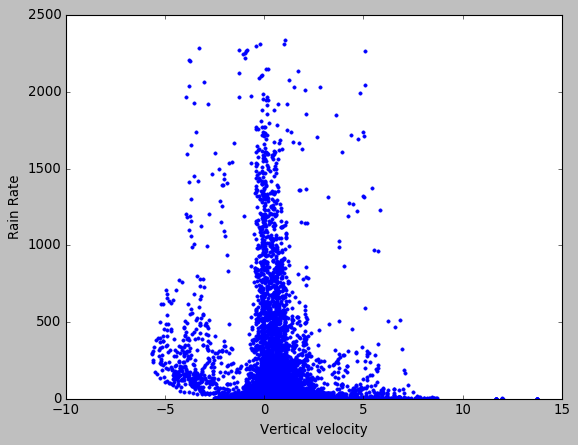

In [178]:
plt.plot(data2['V'],data2['R'],'.')
plt.xlabel('Vertical velocity')
plt.ylabel('Rain Rate')
plt.show()

In [179]:
x=np.column_stack([data['V'],data['V']**0])
y=data['W']

mod = sm.OLS(y, x)
res = mod.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     53.05
Date:                Thu, 06 Feb 2020   Prob (F-statistic):           3.32e-13
Time:                        17:35:43   Log-Likelihood:            -1.9496e+05
No. Observations:               34468   AIC:                         3.899e+05
Df Residuals:                   34466   BIC:                         3.899e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.2503      0.309      7.283      0.000       1.645       2.856
const          4.8453      0.374     12.954      0.000       4.112       5.578
==============================================================================
Omnibus:                   114957.189   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      26362172736.678
Skew:                          59.186   Prob(JB):                         0.00
Kurtosis:                    4285.746   Cond. No.                         1.23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

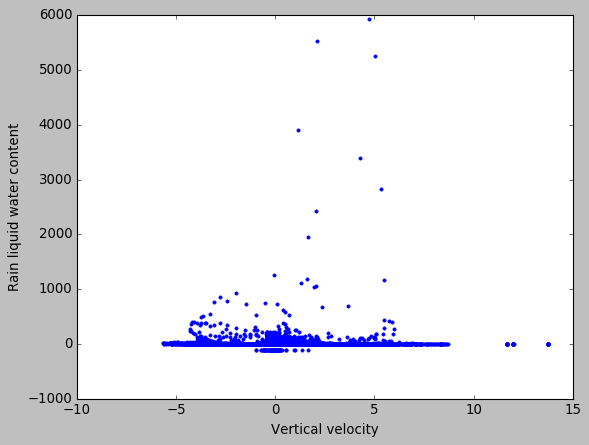

In [180]:
plt.plot(data['V'],data['W'],'.')
plt.xlabel('Vertical velocity')
plt.ylabel('Rain liquid water content')
plt.show()

In [181]:
data3=data[data['W']>0]
data3=data3[data3['W']<1000]

In [182]:
x=np.column_stack([data3['V'],data3['V']**0])
y=data3['R']

mod = sm.OLS(y, x)
res = mod.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      R   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     10.76
Date:                Thu, 06 Feb 2020   Prob (F-statistic):            0.00104
Time:                        17:35:44   Log-Likelihood:            -2.3976e+05
No. Observations:               34386   AIC:                         4.795e+05
Df Residuals:                   34384   BIC:                         4.795e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -3.7867      1.154     -3.281      0.001      -6.049      -1.524
const         52.3964      1.397     37.517      0.000      49.659      55.134
==============================================================================
Omnibus:                    64214.075   Durbin-Watson:                   0.606
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        145564335.991
Skew:                          14.123   Prob(JB):                         0.00
Kurtosis:                     320.490   Cond. No.                         1.23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

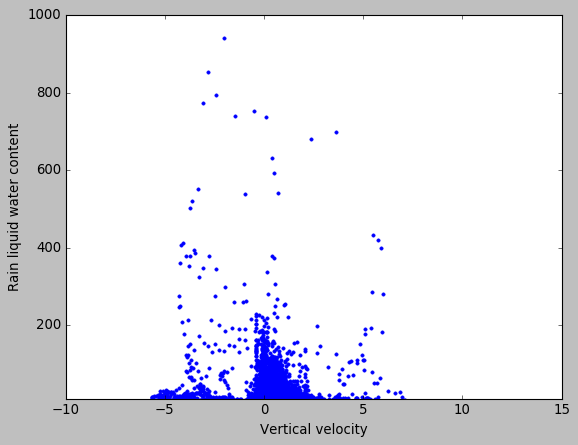

In [183]:
plt.plot(data3['V'],data3['W'],'.')
plt.ylim(10)
plt.xlabel('Vertical velocity')
plt.ylabel('Rain liquid water content')
plt.show()

Contour Plots

In [184]:
h=d.variables['sbd449_range'][:]
dz=d.variables['sbd449_gamma_Z'][:]
t=d.variables['sbd449_time_hour'][:]*60+d.variables['sbd449_time_minute'][:]

In [185]:
h.shape,dz.shape,t.shape

((61,), (660, 61), (660,))

In [186]:
a,b=np.meshgrid(t,h)
print(a.shape,b.shape)

(61, 660) (61, 660)


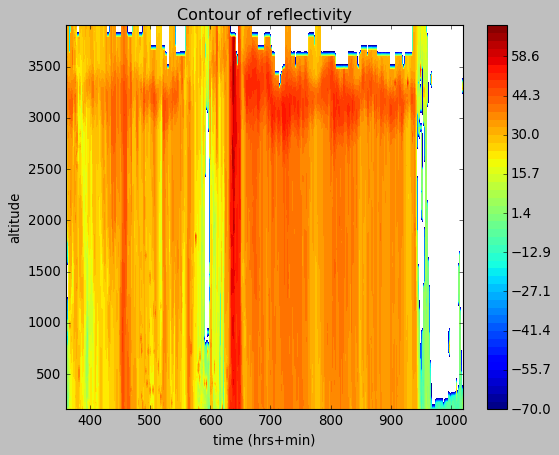

In [187]:
plt.contourf(a,b,dz.T,levels=np.linspace(-70,70))
plt.colorbar()
plt.xlabel('time (hrs+min)')
plt.ylabel('altitude')
plt.title('Contour of reflectivity')
plt.show()

In [188]:
w=d.variables['sbd449_gamma_W'][:]
nw=d.variables['sbd449_gamma_Nw'][:]
wf=np.ma.filled(w.flatten('F'))
nwf=np.ma.filled(nw.flatten('F'))

In [189]:
for i in range(len(nwf)):
    if nwf[i]<0.1*10**11:
        a=np.array(nwf[i])

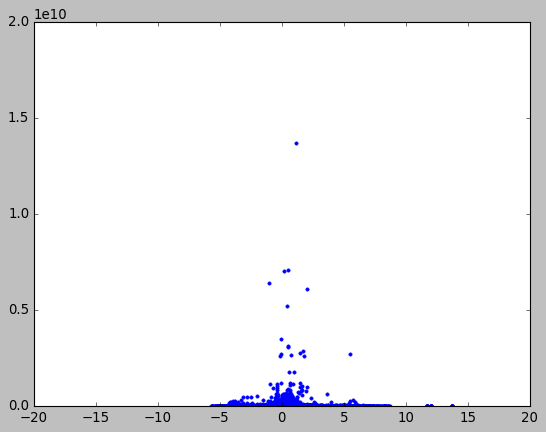

In [199]:
plt.plot(vf,nwf,'.')
#plt.ylim(top=0.1*10**11)
#plt.ylabel('Nw')
plt.xlim(-20,20)
plt.ylim(0,0.2*10**11)
plt.show()